# Flatline exploration 

## Material: PET-G Discodip

## Date: 01-10-2022 11:45-11:58

#### Note: Met rubber

In [1]:
# imports
# system related
import sys
import subprocess

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from datetime import datetime, time

# ml related
import sklearn as sk
import torch
import torch.nn as nn

# import scripts and functions
from functions import *


print('imports succesfull')

imports succesfull


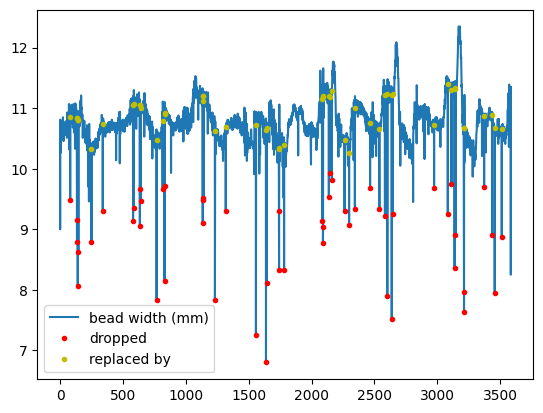

median filt ACTIVATED
import and preprocessing data succesfull


In [2]:
# Defining import variables, _s stands for small
loc_s = '../data/flat_petg_05-20-15.31-15.43.csv'
start_s = '2022-10-05 15:31:00.000'
end_s = '2022-10-05 15:43:00.000'

# import, filter, outlier replacement and median filtering on bead_width (mm)
df_s = import_csv_filt(loc_s, start_s, end_s, plot_outliers=True, outlier_thres=1)

df_s_no_filt = import_csv_filt(loc_s, start_s, end_s, median_filt=False, outlier_thres=1.5)

print('import and preprocessing data succesfull')

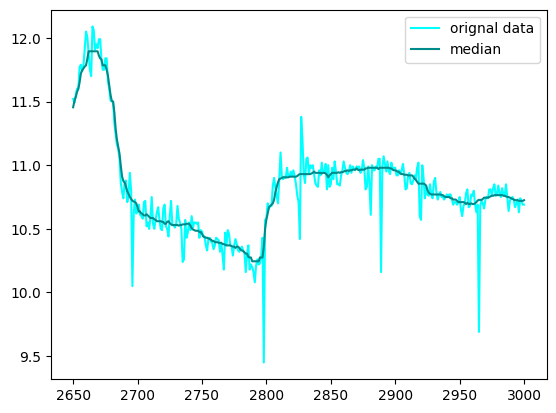

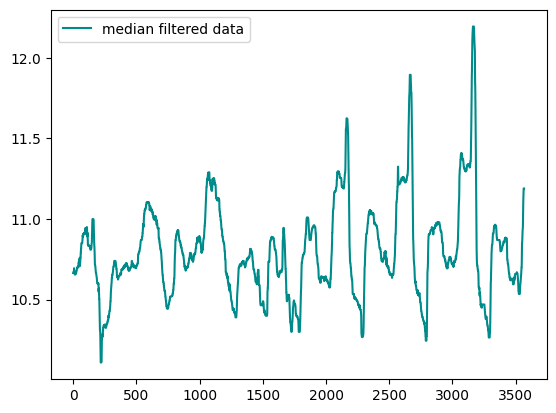

In [3]:
filter_length = 20
head_tails = int(filter_length/2)

bead_gauss = df_s['bead_width (mm)'].rolling(window=filter_length, win_type='gaussian', center=True).mean(std=5)
bead_median = df_s['bead_width (mm)'].rolling(window=filter_length, center=True).median()


plt.plot(df_s_no_filt.loc[2650:3000, 'bead_width (mm)'], 'cyan', label='orignal data')
plt.plot(df_s.loc[2650:3000, 'bead_width (mm)'], 'darkcyan', label='median')
plt.legend()
plt.show()

plt.plot(df_s.loc[:, 'bead_width (mm)'], 'darkcyan', label='median filtered data')
plt.legend()
plt.show()

C:\Users\ceadg\AppData\Local\Temp\ipykernel_18000\2341340287.py:12: RuntimeWarning: divide by zero encountered in divide
  freq = T/n #  /T  Changed to seconds instead of hz


ValueError: x and y must have same first dimension, but have shapes (3563,) and (3567,)

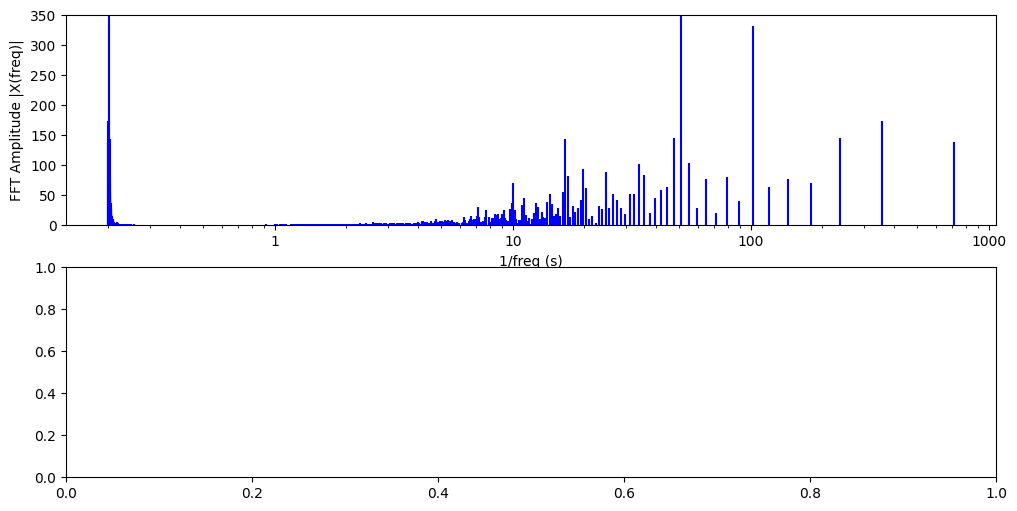

In [4]:
from numpy.fft import fft, ifft
from matplotlib.ticker import ScalarFormatter

sr = 5
ts = 1.0/sr
t = np.arange(0,0.2*3563,ts)

X = fft(df_s.loc[:, 'bead_width (mm)'])
N = len(X)
n = np.arange(N)
T = N/sr
freq = T/n #  /T  Changed to seconds instead of hz

fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(2, 1, 1)
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('1/freq (s)') # instead of plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xscale('log',base=10)
plt.ylim(0, 350)

ax.xaxis.set_major_formatter(ScalarFormatter())

ax = fig.add_subplot(2, 1, 2)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

#### 